# Image Processing SS 16 - Assignment - 06

### Deadline is 8.6.2016 at 16:00 o'clock

Please solve the assignments together with a partner.
I will run every notebook. Make sure the code runs through. Select `Kernel` -> `Restart & Run All` to test it.
Please strip the output from the cells, either select `Cell` -> `All Output` -> `Clear` or use the `nb_strip_output.py` script / git hook.

In [1]:
# display the plots inside the notebook
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
import scipy.io.wavfile
from io import BytesIO
import urllib.request as urllib2
import ssl
import IPython.display as adt
ssl._create_default_https_context = ssl._create_unverified_context
pylab.rcParams['figure.figsize'] = (12, 12)   # This makes the plot bigger

# Exercise 1 - Crosscorrelation - 2 Points
Implement a function myCrossCorrelation, which takes two discrete functions in the form of arrays as an input and outputs the resulting crosscorrelation function. Now apply your correlation function as follows:
a) use as input function 1 an array of 10 random numbers (0-255), function 2 shall be [1], plot the two functions and the result of the crosscorrelation of both.
b) use the same function 1 as in a), function b) shall be [1 2 1]. Plot the two functions and the crosscorrelation of both.
c) repeat the first two tasks but swap the arguments

In [ ]:
def myCrossCorrelation(func1, func2):
    res_func = np.zeros(func1.shape[0] + func2.shape[0])
    func2 = np.flip(func2)

    for i in range(func1.shape[0]):
        for j in range(func2.shape[0]):
            res_func[i+j] = res_func[i+j] + func1[i]*func2[j]
    return res_func

func1 = np.random.randint(0, 255, 10)
func2 = np.array([1])
func3 = np.array([1, 2, 1])
plt.subplot(221)
plt.plot(func1)
plt.plot(func2)
plt.plot(myCrossCorrelation(func1, func2))

plt.subplot(222)
plt.plot(func1)
plt.plot(func3)
plt.plot(myCrossCorrelation(func1, func3))

plt.subplot(223)
plt.plot(func1)
plt.plot(func2)
plt.plot(myCrossCorrelation(func2, func1))

plt.subplot(224)
plt.plot(func1)
plt.plot(func3)
plt.plot(myCrossCorrelation(func3, func1))
plt.show()


# Exercise 2 - Discrete Fourier Transformation - 4 Points
Implement the Discrete Fourier Transformation with [Matrix Multiplication](https://en.wikipedia.org/wiki/DFT_matrix).

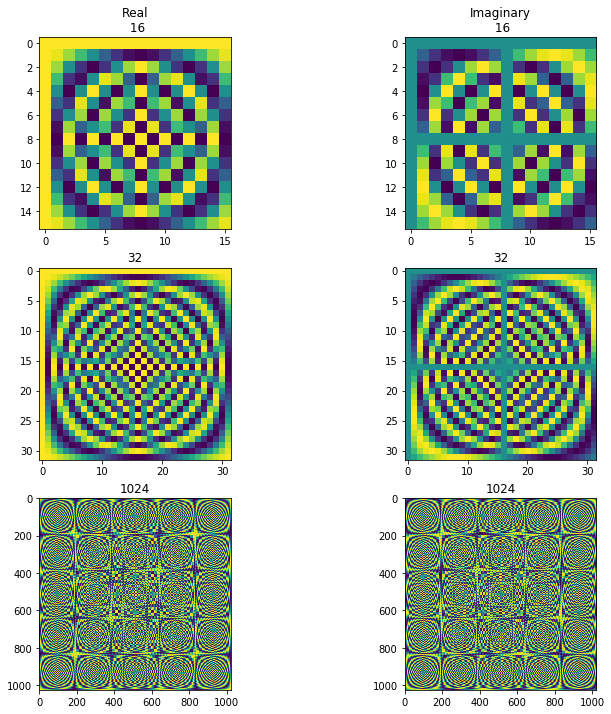

In [3]:
def dft_matrix(n):
    """
    Returns the Discrete Fourier Transformation Matrix of order `n`.
    """
    omega = np.exp( - 2 * np.pi * 1J / n )
    W = np.ones((n,n), dtype=complex)
    for x in range(W.shape[0]):
        for y in range(W.shape[1]):
            W[x,y] = omega**(x*y)
    return W / np.sqrt(n)

dft_16 = dft_matrix(16)
dft_32 = dft_matrix(32)
dft_1024 = dft_matrix(1024)

plt.subplot(321).set_title("Real\n 16")
plt.imshow(dft_16.real)
plt.subplot(322).set_title("Imaginary\n 16")
plt.imshow(dft_16.imag)
plt.subplot(323).set_title("32")
plt.imshow(dft_32.real)
plt.subplot(324).set_title("32")
plt.imshow(dft_32.imag)
plt.subplot(325).set_title("1024")
plt.imshow(dft_1024.real)
plt.subplot(326).set_title("1024")
plt.imshow(dft_1024.imag)
plt.show()

# Exercise 3 - Spectrogram - 4 Points

A [spectrogram](https://en.wikipedia.org/wiki/Spectrogram) visualises the intensities of the different frequencies over time. On the x-axis is the time and on the y-axis are the frequencies.
Your task is to build the spectrogram of the given audio clip. If you failed to do exercise 2, you can use some library for the fourier transformation.

In [ ]:
def load_wav(url):
    f = urllib2.urlopen(url)
    buffer = BytesIO(f.read())
    sample_rate, audio = scipy.io.wavfile.read(buffer)
    if len(audio.shape) == 2:
        # only select one channel
        audio = audio[:, 0]
    return sample_rate, audio / audio.max()

In [ ]:
delphines_url = "http://www.pmel.noaa.gov/acoustics/whales/sounds/whalewav/akhumphi1x.wav"
classic_url = "http://download.naimlabel.com/test/95ffbfec-d57f-4ba8-9fa8-f5c9da56759a.aspx"
# you can choose between delphine sounds and some classic music.
sample_rate, audio = load_wav(delphines_url)

In [ ]:
# listen to the audio
adt.Audio(data=audio, rate=sample_rate)

In [ ]:
# plot the values.
plt.plot(audio)
plt.show()

In [ ]:
def spectogram(audio, window_size=500):
    """
    Builds the spectogram of the audio clip. Split the audio clip into buckets of `window_size` and 
    use the discrete fourier transformation to get the intensity of the frequencies.
    The entery at position (i, j) of the matrix stands for the intensity of the i-th frequencies in the j-th bucket.
    """
    buckets_amount = np.int(len(audio)/window_size)
    result = np.zeros((window_size, buckets_amount),dtype=complex)
    DFT = dft_matrix(window_size)
    buckets = np.split(audio, range(window_size, len(audio), window_size))[:-1]
    
    for j, bucket in enumerate(buckets):
        bucket = bucket.reshape(window_size,1)
        spectrum = np.dot(DFT,bucket).reshape(1,window_size)
        result[:,j] = spectrum
    
    return np.abs(result*result)[len(result)//2:]

In [ ]:
specgram = spectogram(audio, window_size=500)
print(specgram.shape)

In [ ]:
im = plt.imshow(specgram.real, aspect = 2)
plt.colorbar(im, fraction=0.02, pad=0.04)
plt.show()


In [ ]:
# plot it logarithmic
specgram[np.nonzero(specgram)] = 20 * np.log10(specgram[np.nonzero(specgram)])
specgram = np.clip(specgram,-40,200)             # clip off everything a human cannot hear
im = plt.imshow(specgram.real, aspect = 2)
plt.colorbar(im, fraction=0.02, pad=0.04)
plt.show()

im2 = plt.imshow(specgram.real[215:], aspect = 3)      # this is the frequency spectrum where actually something happens
plt.colorbar(im2,fraction=0.002, pad=0.04)
plt.show()